In [138]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


In [139]:
folder_path = "C:\\Users\\allan\\Downloads\\ShoesDataset\\Shoe vs Sandal vs Boot Dataset"
image_size = (128, 128)

In [140]:
def map_dataset(image_tensor, label):
    return image_tensor/255., label

In [141]:
complete_dataset = tf.keras.utils.image_dataset_from_directory(directory=folder_path, labels='inferred', label_mode='categorical', image_size=image_size, shuffle=True, batch_size=32)
complete_dataset = complete_dataset.map(map_dataset)

Found 15000 files belonging to 3 classes.


In [142]:
def display_image(image_tensor):
    plt.imshow(image_tensor)
    plt.show()

tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]], shape=(32, 3), dtype=float32)
(128, 128, 3)


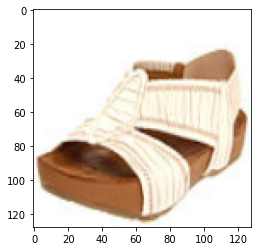

In [143]:
for batch in complete_dataset.take(1):
    data = batch[0]
    label = batch[1]
    print(label)
    image = data[0]
    #print(image.shape)
    display_image(image)



In [186]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (128,128,3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

In [187]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [188]:
model.fit(complete_dataset, epochs = 5)

Epoch 1/5
469/469 [==============================] - 15s 30ms/step - loss: 0.3221 - accuracy: 0.8706
Epoch 2/5
469/469 [==============================] - 14s 30ms/step - loss: 0.1568 - accuracy: 0.9475
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1102 - accuracy: 0.9620
Epoch 4/5
469/469 [==============================] - 14s 29ms/step - loss: 0.0825 - accuracy: 0.9724
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: 0.0607 - accuracy: 0.9799


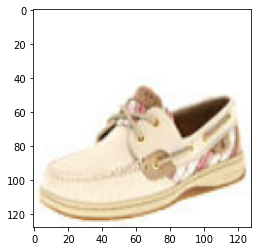

In [212]:
test_image_path = "C:\\Users\\allan\\Downloads\\ShoesDataset\\Shoe vs Sandal vs Boot Dataset\\Shoe\\Shoe (90).jpg"
image_file= tf.io.read_file(test_image_path)
image_tensor = tf.image.decode_png(image_file)
image_tensor = tf.image.resize(image_tensor, (128, 128))
image_tensor = image_tensor/255.0
display_image(image_tensor)

In [244]:
test_image_input = tf.expand_dims(image_tensor, axis = 0)

In [245]:
with tf.GradientTape() as tape:
    inputs = tf.cast(test_image_input, tf.float32)
    tape.watch(inputs)
    actual_prediction = model(inputs)
    expected_prediction = tf.one_hot([2],depth=3)
    expected_prediction = tf.cast(expected_prediction, tf.float32)

    loss = tf.keras.losses.categorical_crossentropy(expected_prediction, actual_prediction)
    gradients = tape.gradient(loss, inputs)
    pass

In [246]:
grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis = -1)
saliency_tensor = tf.cast((grayscale_tensor - tf.reduce_min(grayscale_tensor))/(tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)), tf.float32)

In [247]:
saliency_tensor = saliency_tensor[0]

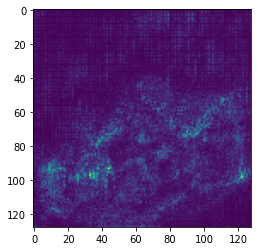

In [248]:
normalized_tensor = tf.expand_dims(saliency_tensor, axis = -1)
display_image(normalized_tensor)

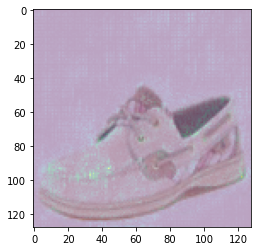

In [249]:
plt.imshow(normalized_tensor, alpha=0.6)
plt.imshow(image_tensor, alpha = 0.4)
plt.show()